#Importing Required libraries

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

# KNN
from sklearn.neighbors import KNeighborsClassifier

# Ensemble Boosting
from sklearn.ensemble import RandomForestClassifier

# Simple Neural Network
from sklearn.neural_network import MLPClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CSE422 ML Project/diabetes_dataset.csv")

#Exploratory Data Analysis

### **summarize data**

In [ ]:
print ('Shape of the dataset is {}. This dataset contains {} rows and {} columns.'.format(df.shape,df.shape[0],df.shape[1]))

Shape of the dataset is (100000, 9). This dataset contains 100000 rows and 9 columns.


In [ ]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0.0,1.0,never,25.19,6.6,140.0,0.0
1,Female,NaN,0.0,0.0,No Info,27.32,6.6,80.0,0.0
2,Male,28.0,0.0,0.0,never,27.32,NaN,158.0,0.0
3,Female,36.0,0.0,0.0,NaN,23.45,5.0,155.0,0.0
4,Male,76.0,1.0,1.0,current,20.14,4.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0.0,0.0,No Info,27.32,6.2,90.0,0.0
99996,Female,2.0,0.0,0.0,No Info,17.37,6.5,NaN,0.0
99997,Male,66.0,0.0,0.0,former,27.83,5.7,155.0,0.0
99998,Female,24.0,0.0,0.0,never,35.42,4.0,100.0,0.0


In [ ]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0.0,1.0,never,25.19,6.6,140.0,0.0
1,Female,NaN,0.0,0.0,No Info,27.32,6.6,80.0,0.0
2,Male,28.0,0.0,0.0,never,27.32,NaN,158.0,0.0
3,Female,36.0,0.0,0.0,NaN,23.45,5.0,155.0,0.0
4,Male,76.0,1.0,1.0,current,20.14,4.8,NaN,NaN
5,Female,20.0,NaN,0.0,never,27.32,6.6,85.0,0.0
6,Female,44.0,0.0,0.0,never,19.31,NaN,200.0,1.0
7,NaN,79.0,0.0,0.0,No Info,23.86,5.7,85.0,0.0
8,Male,42.0,0.0,0.0,never,33.64,4.8,145.0,0.0
9,Female,32.0,0.0,0.0,never,27.32,5.0,100.0,0.0


In [ ]:
categories = df['gender'].unique()
print(categories)

['Female' 'Male' nan 'Other']


In [ ]:
df.nunique()

,0
gender,3
age,102
hypertension,2
heart_disease,2
smoking_history,6
bmi,4174
HbA1c_level,18
blood_glucose_level,18
diabetes,2


In [ ]:
df.isnull().sum()

,0
gender,9835
age,10065
hypertension,10148
heart_disease,9919
smoking_history,9988
bmi,9944
HbA1c_level,10139
blood_glucose_level,9880
diabetes,10082


### **Feature Names and its Datatypes**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90165 non-null  object 
 1   age                  89935 non-null  float64
 2   hypertension         89852 non-null  float64
 3   heart_disease        90081 non-null  float64
 4   smoking_history      90012 non-null  object 
 5   bmi                  90056 non-null  float64
 6   HbA1c_level          89861 non-null  float64
 7   blood_glucose_level  90120 non-null  float64
 8   diabetes             89918 non-null  float64
dtypes: float64(7), object(2)
memory usage: 6.9+ MB


### **Data Spliting**

In [ ]:
#Selecting numerical features
numerical_data = df.select_dtypes(include='number')

#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 7 numerical features: 

['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


In [ ]:
#Selecting categoricalfeatures
categorical_data=df.select_dtypes(include= 'object')

#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 2 categorical features: 

['gender', 'smoking_history']


### Descriptive Analysis

### Summary statics of Numerical Featrues

In [ ]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,89935.0,41.910520,22.506302,0.08,24.00,43.00,60.00,80.00
hypertension,89852.0,0.075346,0.263950,0.00,0.00,0.00,0.00,1.00
heart_disease,90081.0,0.039143,0.193935,0.00,0.00,0.00,0.00,1.00
bmi,90056.0,27.311793,6.634078,10.01,23.63,27.32,29.57,95.69
HbA1c_level,89861.0,5.528352,1.070551,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,90120.0,137.995018,40.590751,80.00,100.00,140.00,159.00,300.00
diabetes,89918.0,0.084900,0.278734,0.00,0.00,0.00,0.00,1.00


### Summary statics of Categorical Featrues

In [ ]:
# Transposed stats for categorical features

categorical_data.describe().T

,count,unique,top,freq
gender,90165,3,Female,52721
smoking_history,90012,6,No Info,32276


### **Variance of each numerical features**

In [ ]:
numerical_data.var()

,0
age,506.533629
hypertension,0.069670
heart_disease,0.037611
bmi,44.010990
HbA1c_level,1.146079
blood_glucose_level,1647.609103
diabetes,0.077693


### **Skew in numerical features**

In [ ]:
numerical_data.skew()

,0
age,-0.053232
hypertension,3.217750
heart_disease,4.752803
bmi,1.049610
HbA1c_level,-0.065342
blood_glucose_level,0.816136
diabetes,2.978539


### **Histograms and Box Plot**

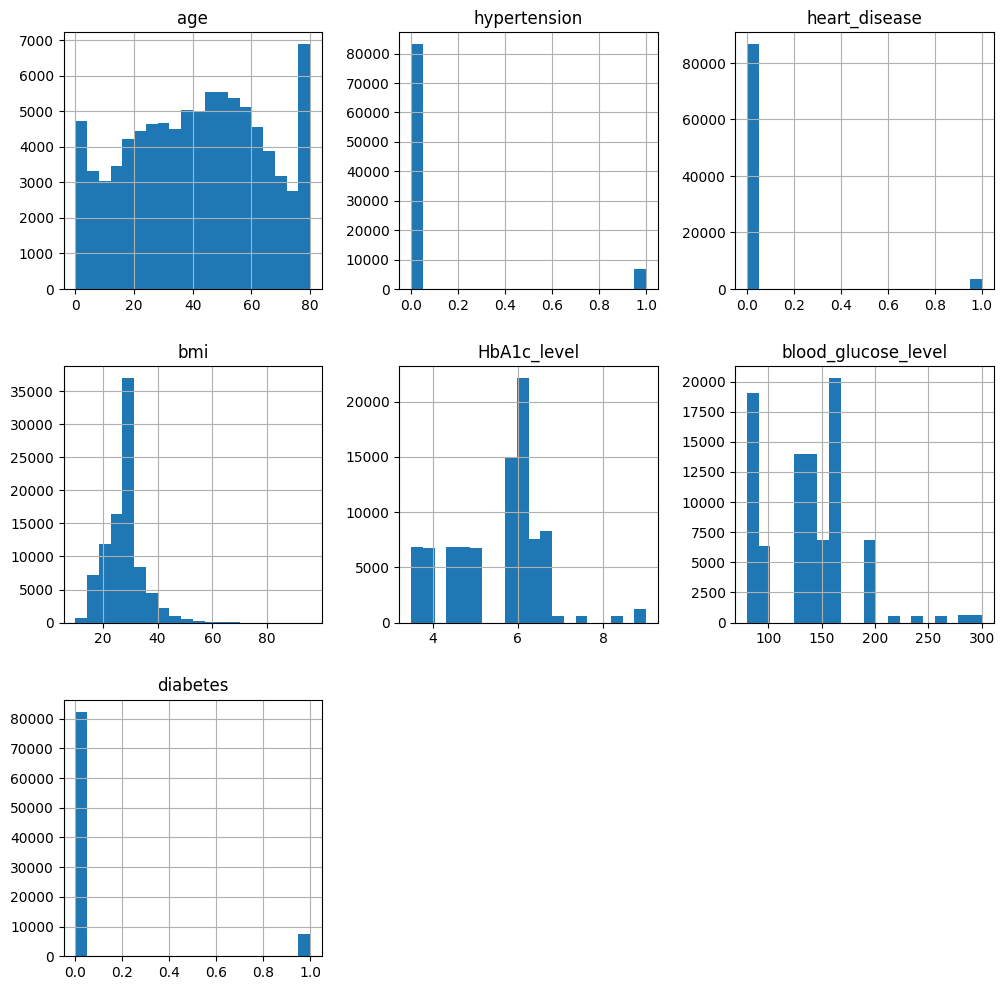

In [ ]:
numerical_data.hist(figsize=(12,12),bins=20)
plt.show()

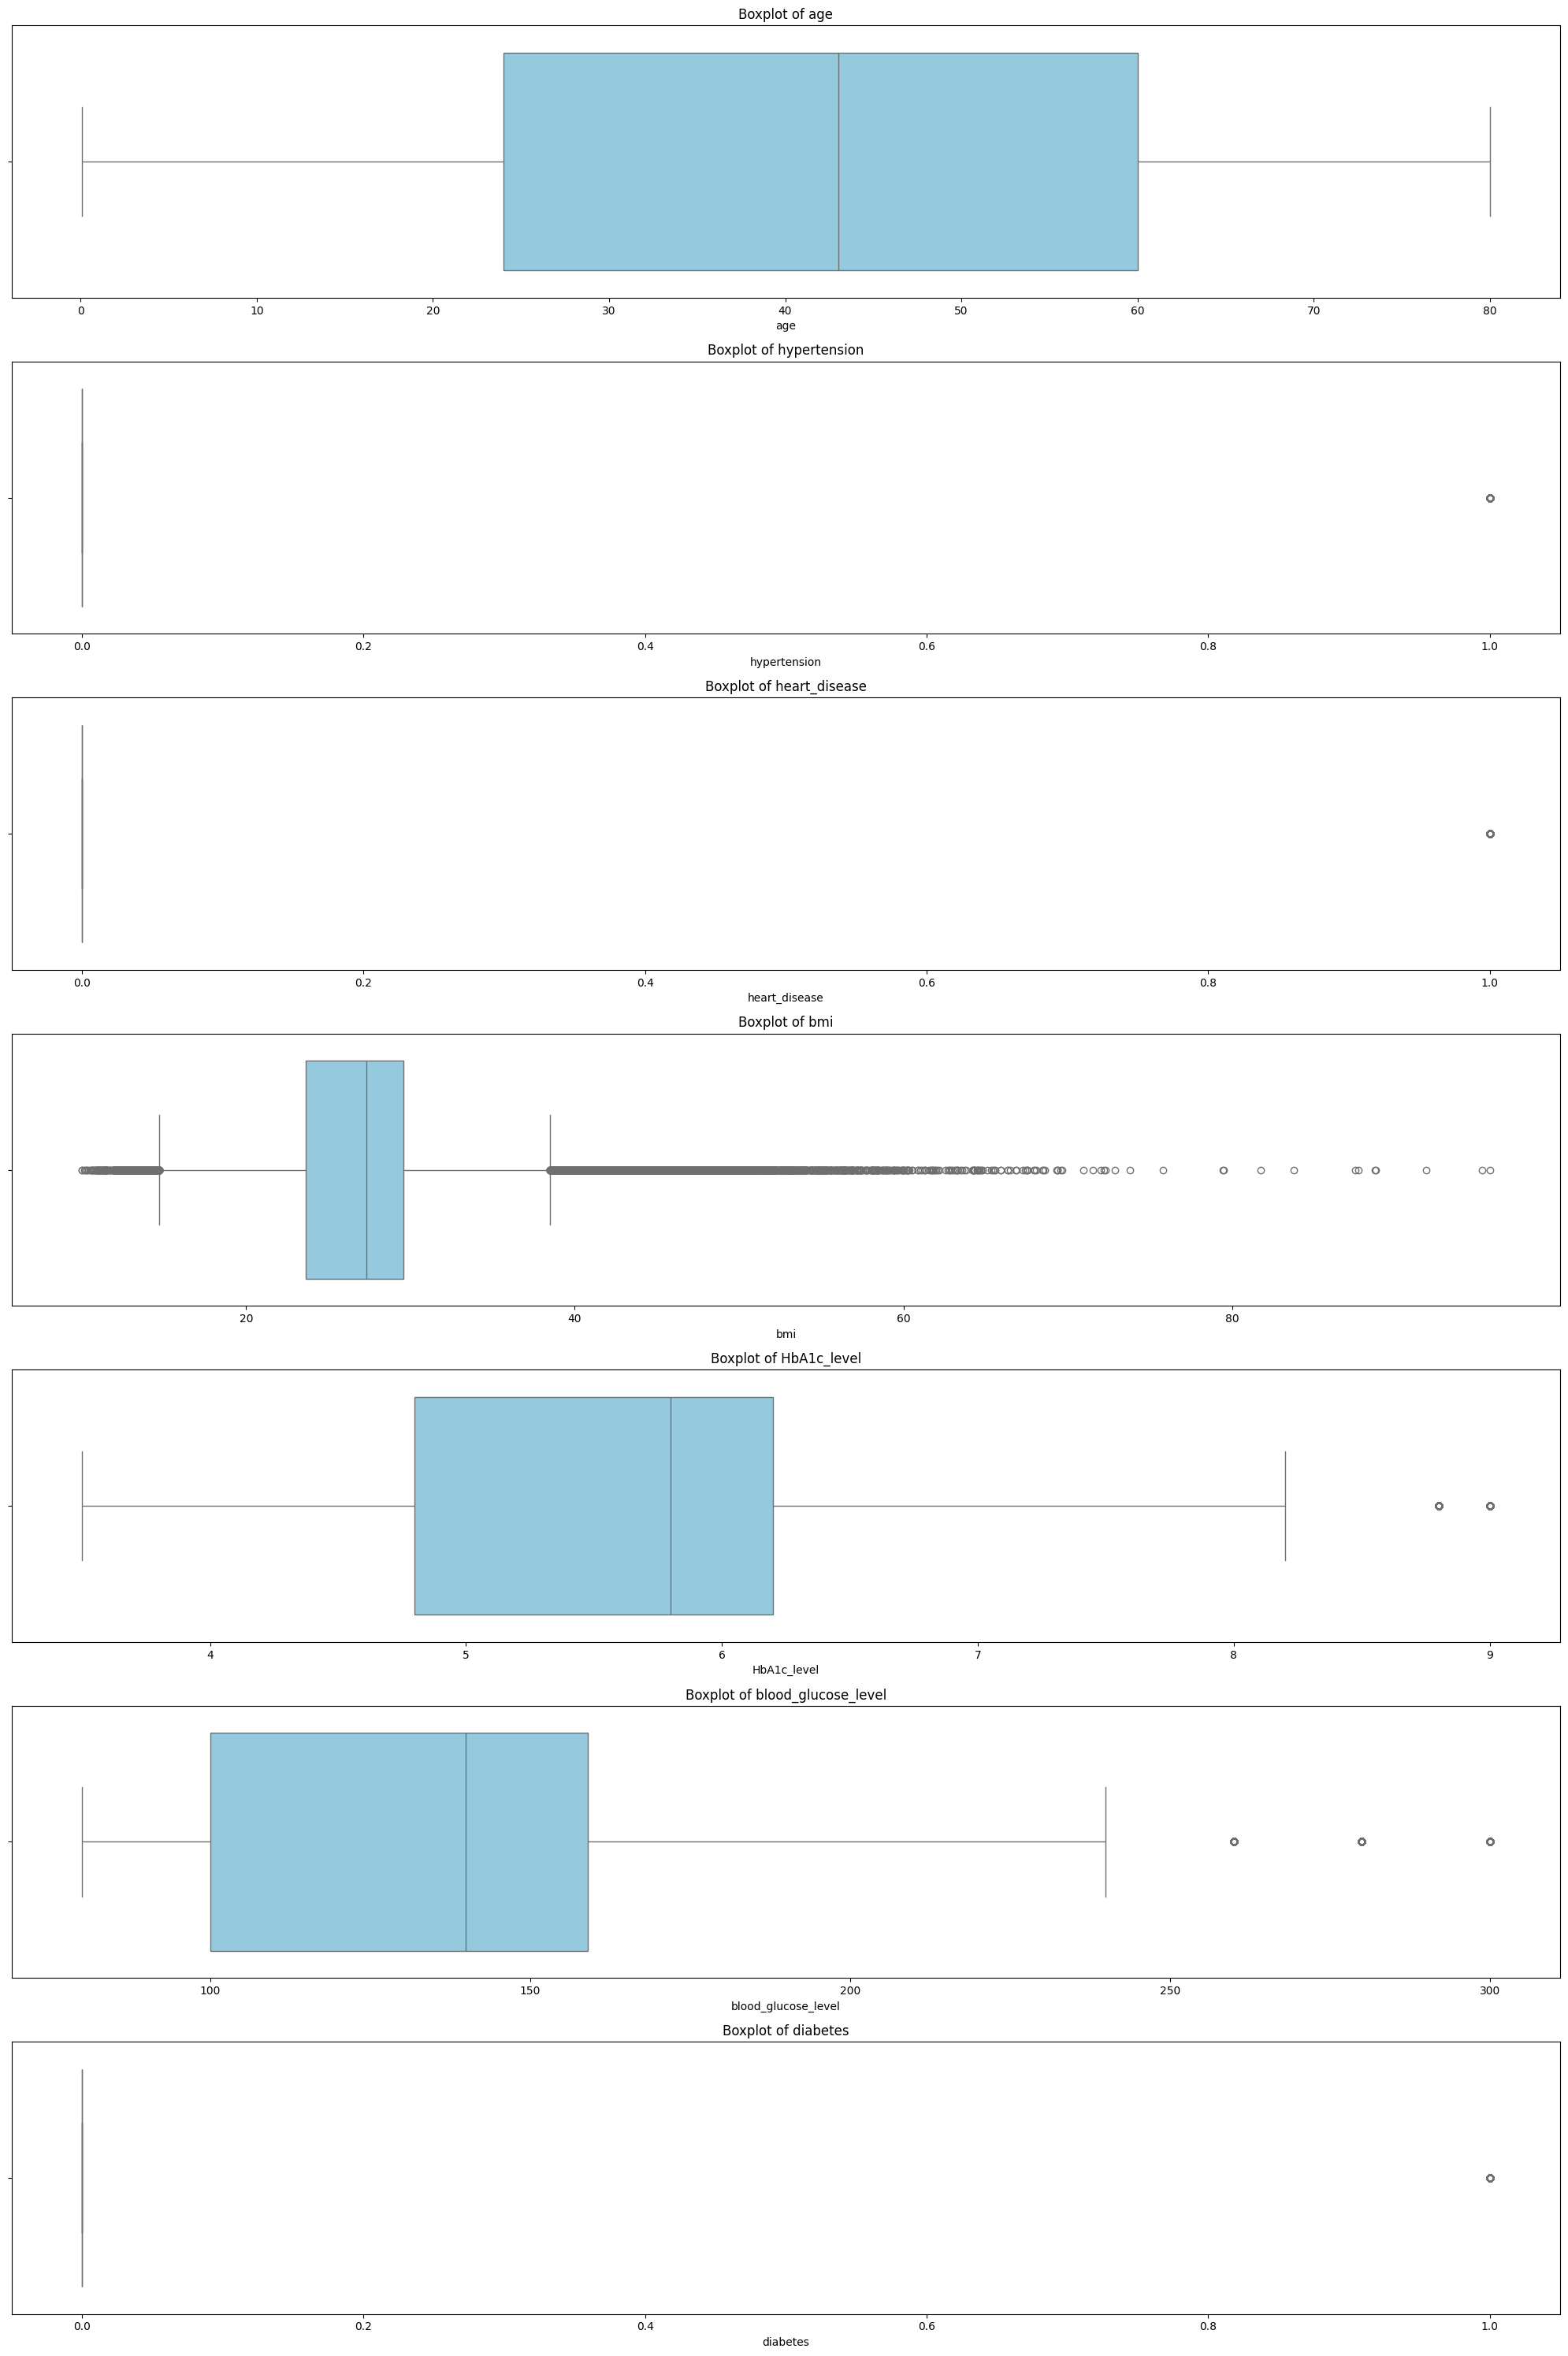

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for boxplot analysis
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set up the figure
plt.figure(figsize=(20, 30))

# Plot boxplots for each numerical feature including the target variable 'OUTCOME'
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

plt.show()

### **Number Unique values in each feature**

In [ ]:
numerical_data.nunique()

,0
age,102
hypertension,2
heart_disease,2
bmi,4174
HbA1c_level,18
blood_glucose_level,18
diabetes,2


### **Missing Values**

In [ ]:
numerical_data.isnull().sum()

,0
age,10065
hypertension,10148
heart_disease,9919
bmi,9944
HbA1c_level,10139
blood_glucose_level,9880
diabetes,10082


### **Categorical Features**


In [ ]:
# unique values counts
unique_counts=categorical_data.nunique()
print(unique_counts)

gender             3
smoking_history    6
dtype: int64


### **Barplot of unique value counts in every categorical features**

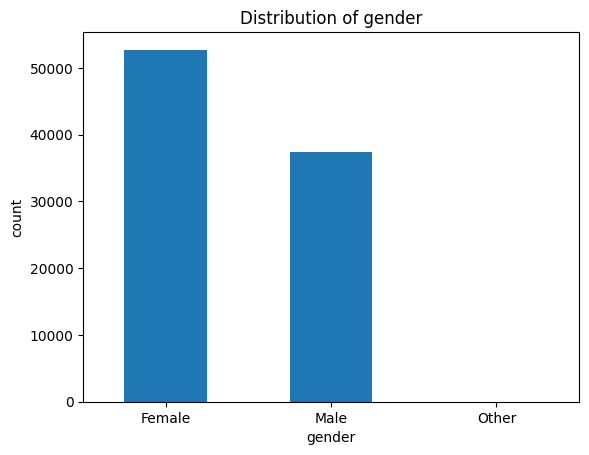

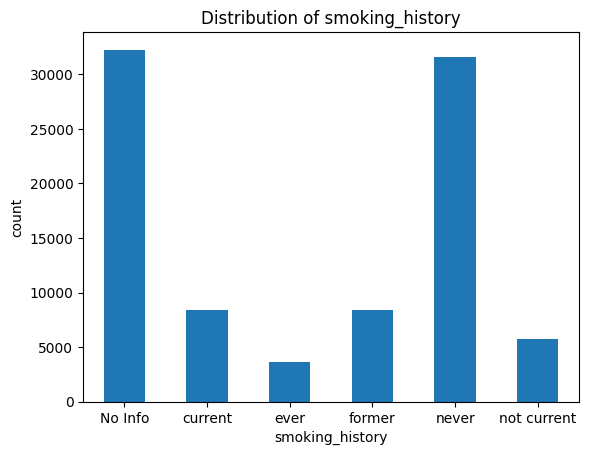

In [ ]:
for col in categorical_features:
    plt.title(f'Distribution of {col}')
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col,ylabel='count')
    plt.show()

### **Correlation Analysis**
### **Correlation matrix of whole dataset**

In [ ]:
# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
correlation_matrix


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.252141,0.233471,0.339047,0.101355,0.110857,0.258452
hypertension,0.252141,1.000000,0.121891,0.148843,0.080719,0.081470,0.197613
heart_disease,0.233471,0.121891,1.000000,0.059987,0.063484,0.069497,0.170573
bmi,0.339047,0.148843,0.059987,1.000000,0.086219,0.087871,0.214013
HbA1c_level,0.101355,0.080719,0.063484,0.086219,1.000000,0.167213,0.400583
blood_glucose_level,0.110857,0.081470,0.069497,0.087871,0.167213,1.000000,0.417611
diabetes,0.258452,0.197613,0.170573,0.214013,0.400583,0.417611,1.000000


### **Correlation Heatmap plot of whole dataset**

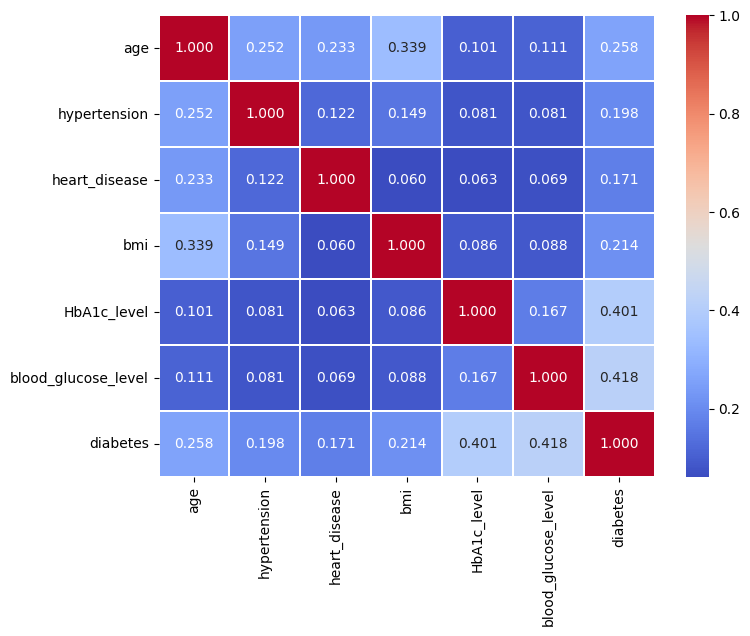

In [ ]:
# Plotting the heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.3)
plt.show()


### **Check imbalance in the data**

In [ ]:
#check Imbalance in data

#group instances based on the classes in OUTCOME variable
class_counts=df.groupby("diabetes").size()

columns=['diabetes','count','percentage']
outcome=[0,1]
count=list()
percentage=list()

#Calculate the percentage of each value of the OUTCOME variable from total
for val in range(2):
    count.append(class_counts[val])
    percent=(class_counts[val]/105000)*100
    percentage.append(percent)

# Convert the calulated values into a dataframe
imbalance_df=pd.DataFrame(list(zip(outcome,count,percentage)),columns=columns)
imbalance_df

,diabetes,count,percentage
0,0,82284,78.365714
1,1,7634,7.270476


### **Barplot of diabetes vs Percentage**

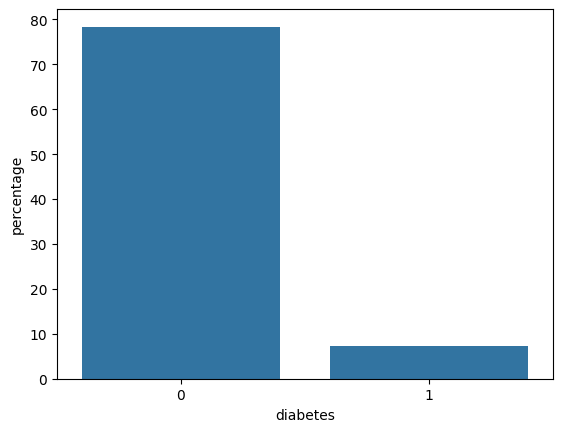

In [ ]:
sns.barplot(data=imbalance_df,x=imbalance_df['diabetes'],y=imbalance_df['percentage'])
plt.show()

### **Density plots of numerical features**

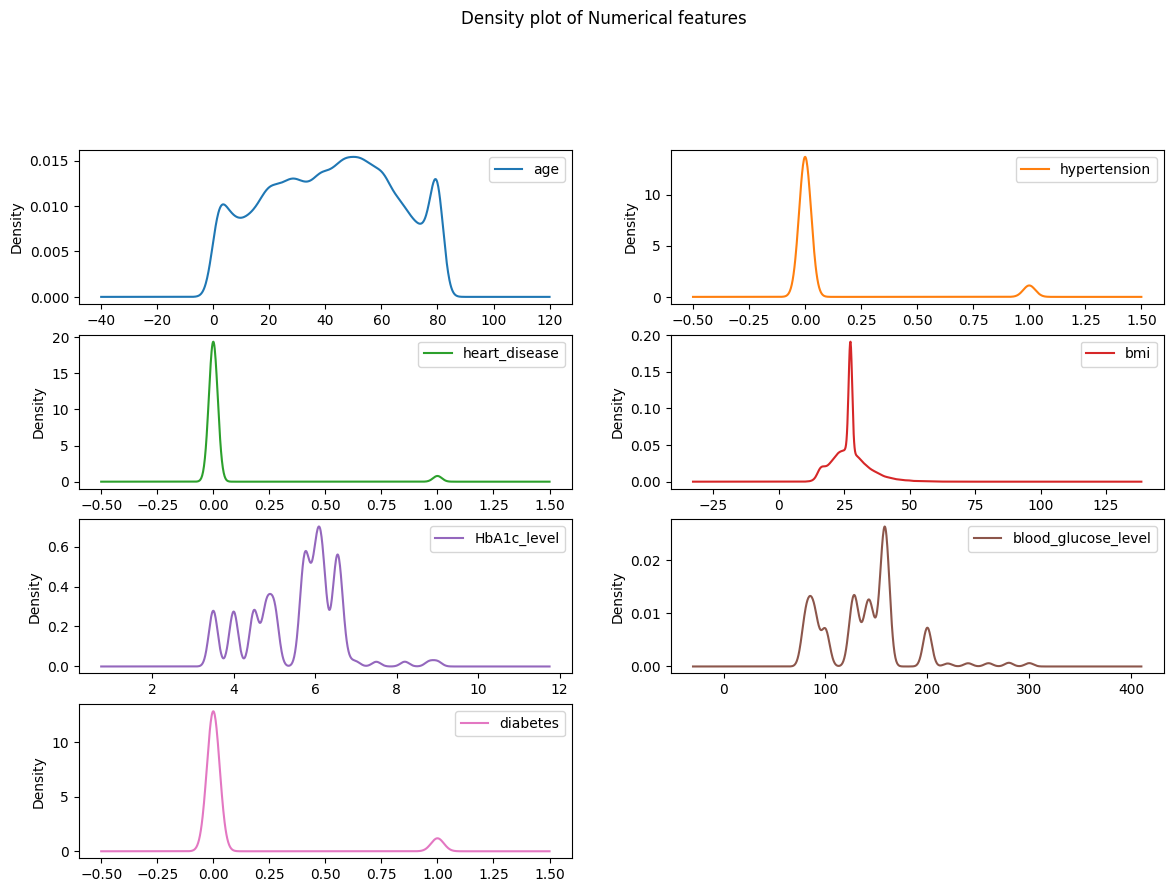

In [ ]:
numerical_data.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Density plot of Numerical features",sharex=False)
plt.show()

# Data Preprocessing

In [ ]:
# Drop rows with missing target
df.dropna(subset=['diabetes'], inplace=True)

In [ ]:
# Feature engineering
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

def age_group(age):
    if age < 30:
        return 'Young'
    elif 30 <= age < 50:
        return 'Middle_Aged'
    else:
        return 'Senior'

df['bmi_category'] = df['bmi'].apply(bmi_category)
df['age_group'] = df['age'].apply(age_group)

In [ ]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_category,age_group
0,Female,80.0,0.0,1.0,never,25.19,6.6,140.0,0.0,Overweight,Senior
1,Female,NaN,0.0,0.0,No Info,27.32,6.6,80.0,0.0,Overweight,Senior
2,Male,28.0,0.0,0.0,never,27.32,NaN,158.0,0.0,Overweight,Young
3,Female,36.0,0.0,0.0,NaN,23.45,5.0,155.0,0.0,Normal,Middle_Aged
5,Female,20.0,NaN,0.0,never,27.32,6.6,85.0,0.0,Overweight,Young
...,...,...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0.0,0.0,No Info,27.32,6.2,90.0,0.0,Overweight,Senior
99996,Female,2.0,0.0,0.0,No Info,17.37,6.5,NaN,0.0,Underweight,Young
99997,Male,66.0,0.0,0.0,former,27.83,5.7,155.0,0.0,Overweight,Senior
99998,Female,24.0,0.0,0.0,never,35.42,4.0,100.0,0.0,Obese,Young


In [ ]:
#Numerical Features
scaled_num_features = ['HbA1c_level', 'blood_glucose_level']
unscaled_num_features = ['hypertension', 'heart_disease']

#Categorical Features
cat_features = ['gender', 'smoking_history', 'bmi_category', 'age_group']

#Target Feature
target = 'diabetes'

In [ ]:
# Pipelines
scaled_num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

unscaled_num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('scaled_num', scaled_num_pipeline, scaled_num_features),
    ('unscaled_num', unscaled_num_pipeline, unscaled_num_features),
    ('cat', cat_pipeline, cat_features)
])

In [ ]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_category,age_group
0,Female,80.0,0.0,1.0,never,25.19,6.6,140.0,0.0,Overweight,Senior
1,Female,NaN,0.0,0.0,No Info,27.32,6.6,80.0,0.0,Overweight,Senior
2,Male,28.0,0.0,0.0,never,27.32,NaN,158.0,0.0,Overweight,Young
3,Female,36.0,0.0,0.0,NaN,23.45,5.0,155.0,0.0,Normal,Middle_Aged
5,Female,20.0,NaN,0.0,never,27.32,6.6,85.0,0.0,Overweight,Young
6,Female,44.0,0.0,0.0,never,19.31,NaN,200.0,1.0,Normal,Middle_Aged
7,NaN,79.0,0.0,0.0,No Info,23.86,5.7,85.0,0.0,Normal,Senior
8,Male,42.0,0.0,0.0,never,33.64,4.8,145.0,0.0,Obese,Middle_Aged
9,Female,32.0,0.0,0.0,never,27.32,5.0,100.0,0.0,Overweight,Middle_Aged
10,Female,53.0,0.0,0.0,never,27.32,6.1,85.0,0.0,Overweight,Senior


### Train-Test Split

In [ ]:
X = df[scaled_num_features + unscaled_num_features + cat_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(min_samples_split= 2, min_samples_leaf= 2, max_depth= 10, criterion= 'gini'),
    'KNN': KNeighborsClassifier(weights= 'distance', n_neighbors= 20, metric= 'manhattan'),
    'Random Forest': RandomForestClassifier(min_samples_split= 8, min_samples_leaf= 1, max_depth= 15, criterion= 'entropy'),
    'Neural Network': MLPClassifier(solver= 'sgd', learning_rate= 'adaptive', hidden_layer_sizes= (50, 50), alpha= 0.0001, activation= 'tanh')
}
results = []

for name, model in models.items():
    # Fit and predict
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    model_results = {
    'Model': name,
    'Accuracy': accuracy,
    'Precision': report['weighted avg']['precision'],
    'Recall': report['weighted avg']['recall'],
    'F1-Score': report['weighted avg']['f1-score'],
    'Confusion_Matrix': cm,
    'ROC_Curve': None,
    'AUC': None
    }

    # Handle AUC and ROC curve for models that support predict_proba
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test_processed)[:, 1]  # Probability of class 1
        model_results['AUC'] = roc_auc_score(y_test, y_pred_proba)
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        model_results['ROC_Curve'] = (fpr, tpr)

    results.append(model_results)

    # Print current results
    print(f"\n{'='*50}")
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    if model_results['AUC'] is not None:
        print(f"AUC: {model_results['AUC']:.4f}")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix:\n{cm}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)


Results for Logistic Regression:
Accuracy: 0.9554
AUC: 0.9438
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     24686
         1.0       0.87      0.55      0.68      2290

    accuracy                           0.96     26976
   macro avg       0.92      0.77      0.83     26976
weighted avg       0.95      0.96      0.95     26976

Confusion Matrix:
[[24504   182]
 [ 1020  1270]]

Results for Decision Tree:
Accuracy: 0.9669
AUC: 0.9636
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     24686
         1.0       1.00      0.61      0.76      2290

    accuracy                           0.97     26976
   macro avg       0.98      0.81      0.87     26976
weighted avg       0.97      0.97      0.96     26976

Confusion Matrix:
[[24679     7]
 [  885  1405]]

Results for KNN:
Accuracy: 0.9553
AUC: 0.8974
              precision    recall  f1-score   support

         0.0       0.96   

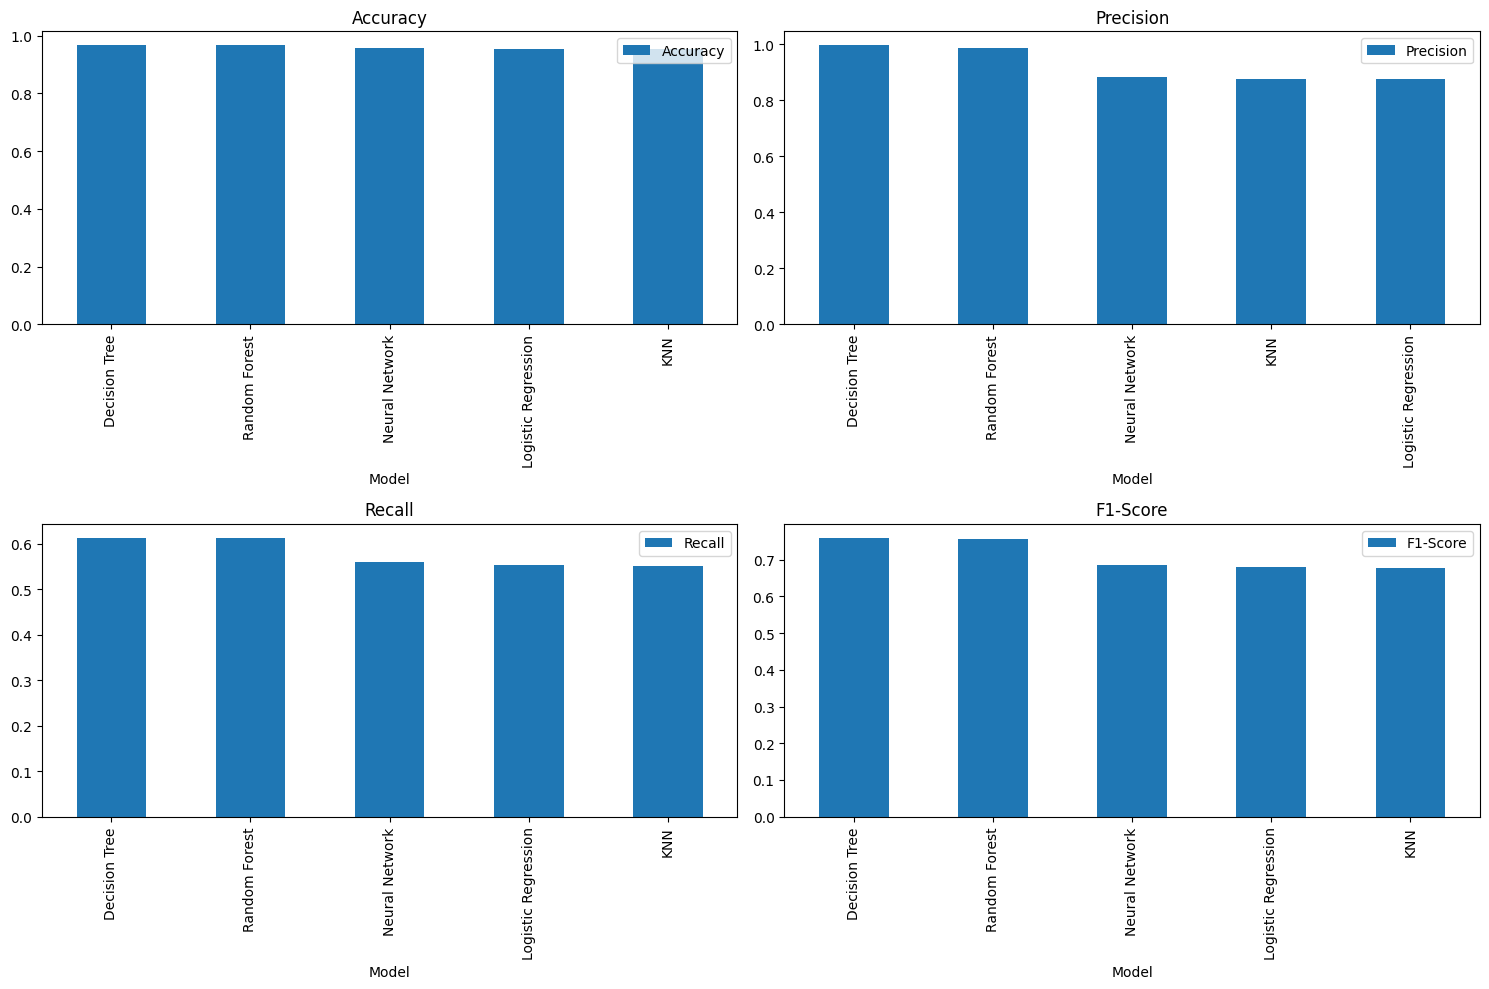

In [ ]:
def plot_metrics_comparison(results_df):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    if 'AUC' in results_df.columns:
        metrics.append('AUC')

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    axes = axes.flatten()

    for i, metric in enumerate(metrics[:4]):
        results_df.sort_values(by=metric, ascending=False).plot(
            x='Model', y=metric, kind='bar', ax=axes[i], title=metric)

    plt.tight_layout()
    plt.show()


plot_metrics_comparison(results_df)

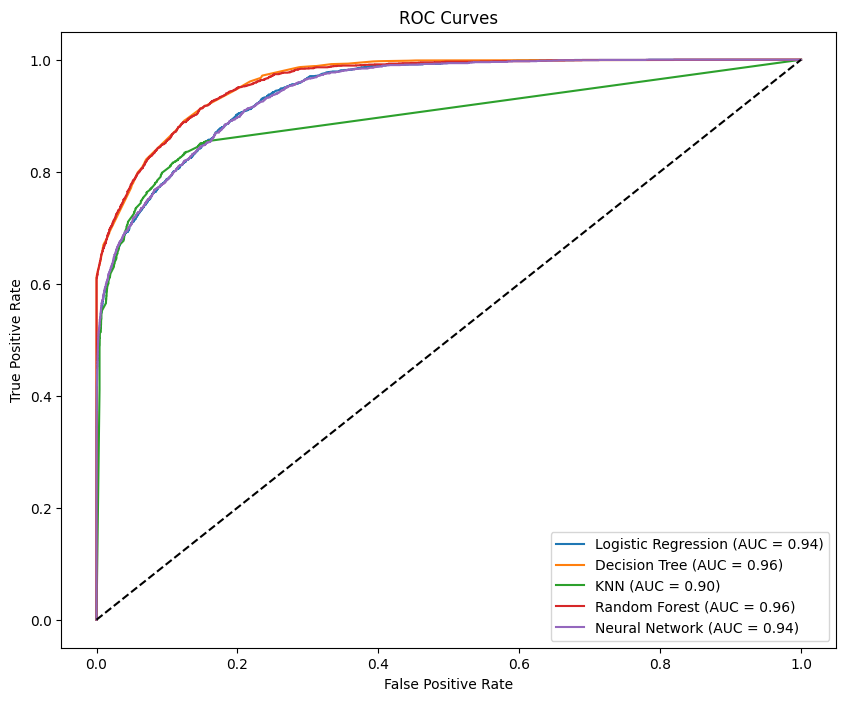

In [ ]:
def plot_roc_curves(results_df):
    plt.figure(figsize=(10, 8))
    for _, row in results_df.iterrows():
        if row.get('ROC_Curve') is not None:  # Check for 'ROC_Curve' column
            fpr, tpr = row['ROC_Curve']  # Access the (fpr, tpr) tuple
            plt.plot(fpr, tpr, label=f"{row['Model']} (AUC = {row['AUC']:.2f})")

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend()
    plt.show()

plot_roc_curves(results_df)

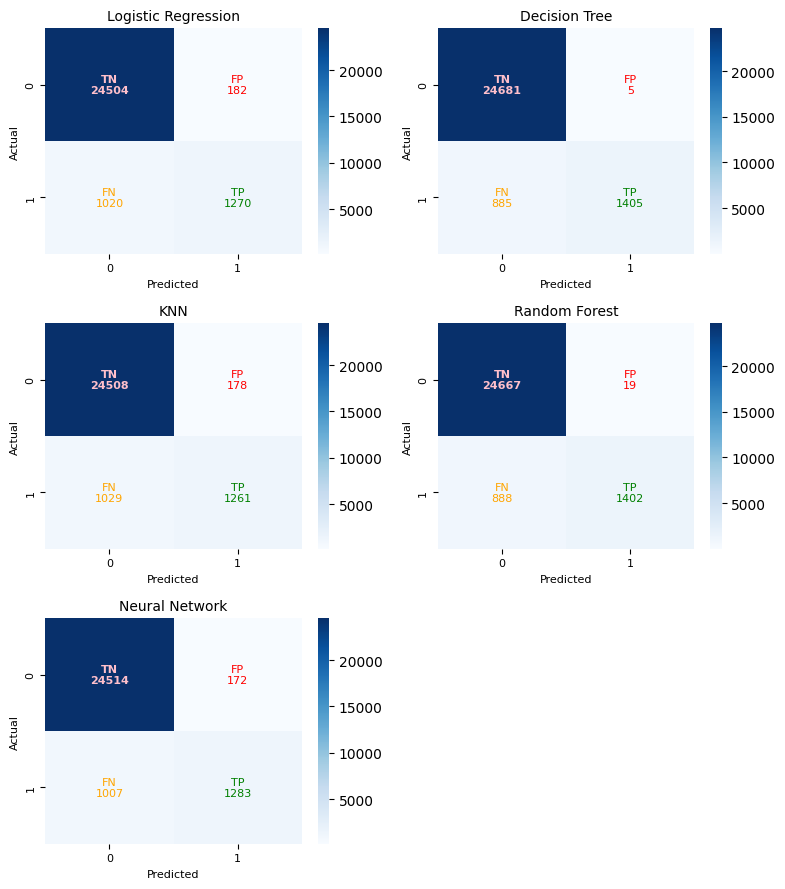

In [ ]:
def plot_confusion_matrices(results_df):
    n = len(results_df)
    fig, axes = plt.subplots(nrows=(n+1)//2, ncols=2, figsize=(8, 3*((n+1)//2)))
    axes = axes.flatten()

    for i, row in results_df.iterrows():
        cm = row['Confusion_Matrix']
        ax = axes[i]
        sns.heatmap(cm, annot=False, fmt='d', ax=ax, cmap='Blues')
        ax.set_title(row['Model'], fontsize=10)
        ax.set_xlabel('Predicted', fontsize=8)
        ax.set_ylabel('Actual', fontsize=8)
        ax.set_xticklabels(['0', '1'], fontsize=8)
        ax.set_yticklabels(['0', '1'], fontsize=8)


        ax.text(0.5, 0.5, f'TN\n{cm[0,0]}', ha='center', va='center', fontsize=8, color='pink', fontweight='bold')
        ax.text(1.5, 0.5, f'FP\n{cm[0,1]}', ha='center', va='center', fontsize=8, color='red')
        ax.text(0.5, 1.5, f'FN\n{cm[1,0]}', ha='center', va='center', fontsize=8, color='orange')
        ax.text(1.5, 1.5, f'TP\n{cm[1,1]}', ha='center', va='center', fontsize=8, color='green')

    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()  # Show combined confusion matrix plot

plot_confusion_matrices(results_df)

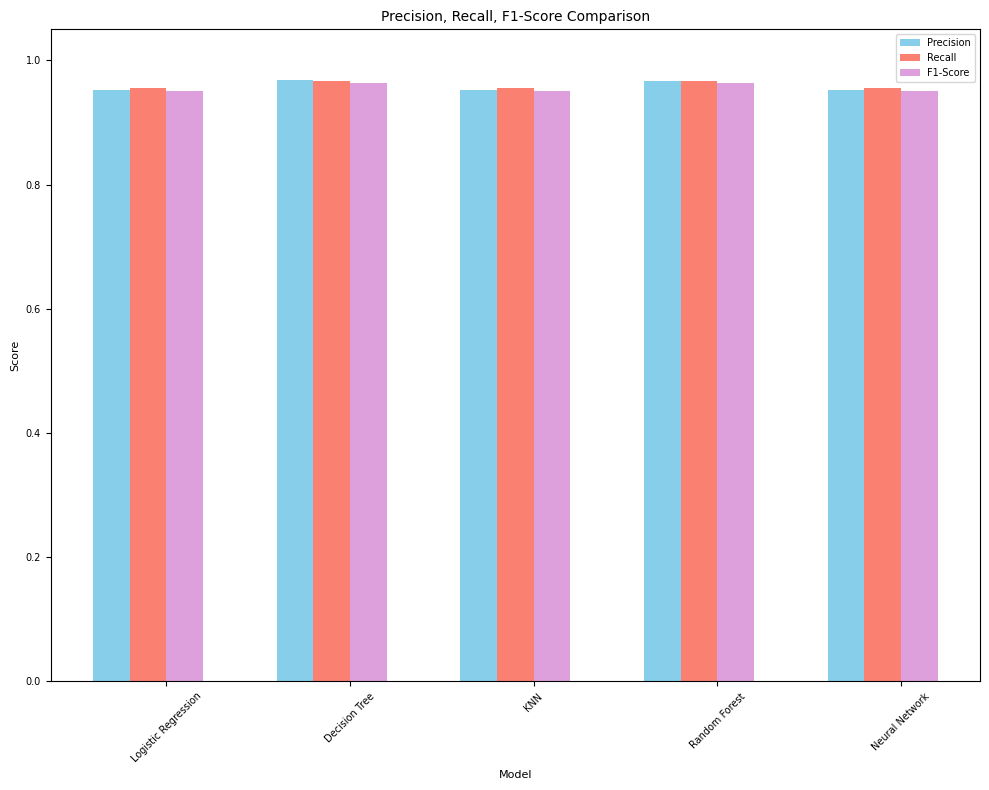

In [ ]:
def plot_precision_recall_comparison(results_df):
    plt.figure(figsize=(10, 8))

    bar_width = 0.2
    x = np.arange(len(results_df))

    plt.bar(x,                      results_df['Precision'], color='skyblue',   width=bar_width, label='Precision')
    plt.bar(x + bar_width,          results_df['Recall'],    color='salmon',    width=bar_width, label='Recall')
    plt.bar(x + 2 * bar_width,      results_df['F1-Score'],  color='plum',      width=bar_width, label='F1-Score')


    plt.xlabel('Model', fontsize=8)
    plt.ylabel('Score', fontsize=8)
    plt.title('Precision, Recall, F1-Score Comparison', fontsize=10)
    plt.xticks(x + 1.5 * bar_width, results_df['Model'], rotation=45, fontsize=7)
    plt.yticks(fontsize=7)
    plt.ylim(0, 1.05)
    plt.legend(fontsize=7)

    plt.tight_layout()
    plt.show()



plot_precision_recall_comparison(results_df)

<ipython-input-130-81ea3b21c456>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='AUC', data=results_df, palette='viridis')


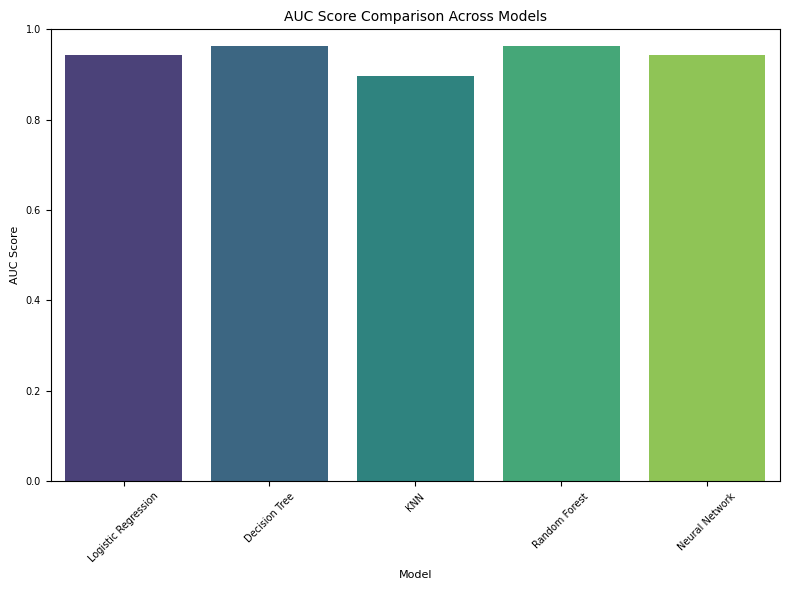

In [ ]:
def plot_auc_scores(results_df):
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Model', y='AUC', data=results_df, palette='viridis')

    plt.title('AUC Score Comparison Across Models', fontsize=10)
    plt.xlabel('Model', fontsize=8)
    plt.ylabel('AUC Score', fontsize=8)
    plt.ylim(0.0, 1.0)
    plt.xticks(rotation=45, fontsize=7)
    plt.yticks(fontsize=7)
    plt.tight_layout()
    plt.show()

plot_auc_scores(results_df)


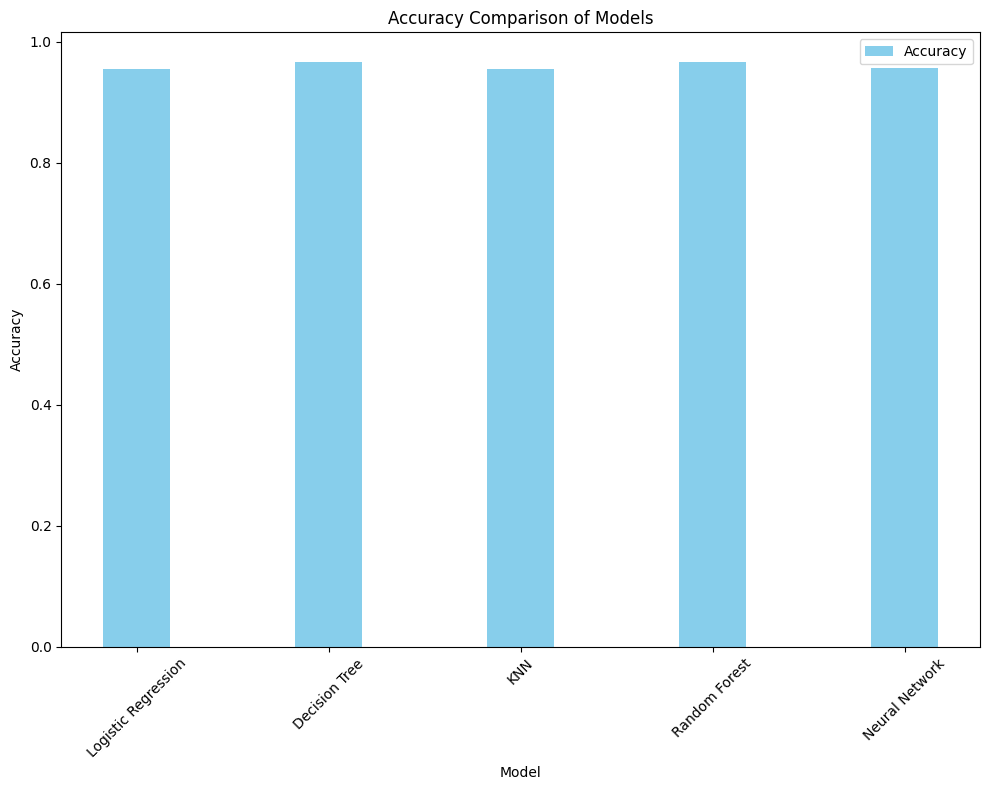

In [ ]:
def plot_accuracy_comparison(results_df):
    # Create a figure with specified size
    plt.figure(figsize=(10, 8))

    # Bar width
    bar_width = 0.35

    # Position for bars
    r1 = range(len(results_df))

    # Create a horizontal bar chart
    plt.bar(r1, results_df['Accuracy'], color='skyblue', width=bar_width, label='Accuracy')

    # Labeling the axes and chart title
    plt.xlabel('Model', fontsize=10)
    plt.ylabel('Accuracy', fontsize=10)
    plt.title('Accuracy Comparison of Models', fontsize=12)

    # Adjusting the ticks on x-axis for model names
    plt.xticks(r1, results_df['Model'], rotation=45, fontsize=10)
    plt.yticks(fontsize=10)

    # Add legend
    plt.legend(fontsize=10)

    # Adjust layout for tight fitting
    plt.tight_layout()

    # Show the plot
    plt.show()


plot_accuracy_comparison(results_df)